In [2]:
import pandas as pd

In [3]:
dataset=pd.read_csv("Churn_Modelling.csv")

In [4]:
dataset.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [5]:
pd.get_dummies(dataset["Geography"])

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
#To impliment label encoding for multiple columns simultaneously

columns_to_encode = ["Geography" , "Gender"]

# Initialize LabelEncoder
label_encoders = {col: LabelEncoder() for col in columns_to_encode}

# Apply LabelEncoder to each column
for col in columns_to_encode:
    dataset[col] = label_encoders[col].fit_transform(dataset[col])

In [8]:
dataset.drop(columns="Surname", inplace=True)
dataset.head(2)

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0


In [9]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
ss=StandardScaler()
ss.fit_transform(x)
x = pd.DataFrame(ss.fit_transform(x) , columns=x.columns)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=42)

In [14]:
x_test

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,0.433879,-0.047942,-0.564197,0.306591,0.912419,-0.660018,-0.695982,0.324119,0.807737,-1.547768,-1.030670,-1.013811
4684,-0.109292,0.639799,-0.284834,-0.901886,0.912419,0.388871,-1.387538,-1.225848,0.807737,0.646092,0.970243,0.804921
1731,-1.132242,0.428032,-0.512463,1.515067,-1.095988,0.484225,-0.350204,-1.225848,0.807737,0.646092,-1.030670,-0.722147
4742,-0.089201,0.989724,-1.495407,0.306591,0.912419,1.914528,1.032908,0.683816,0.807737,0.646092,0.970243,1.227481
4521,-0.165757,-0.584472,-0.936681,1.515067,-1.095988,-1.136786,0.687130,0.777477,-0.911583,0.646092,0.970243,0.253524
...,...,...,...,...,...,...,...,...,...,...,...,...
6412,0.489304,-1.278399,-0.502117,0.306591,-1.095988,1.342407,-0.004426,0.349118,-0.911583,-1.547768,0.970243,-0.957298
8285,1.138131,-1.644728,-0.429689,-0.901886,0.912419,-1.327494,1.724464,-1.225848,-0.911583,-1.547768,0.970243,0.170498
7853,0.988481,0.774801,0.822271,-0.901886,-1.095988,0.770285,0.687130,-1.225848,-0.911583,0.646092,-1.030670,-1.160142
1095,-1.352558,-0.025852,0.429093,-0.901886,0.912419,-0.946079,-0.350204,-1.225848,-0.911583,0.646092,-1.030670,-0.405759


In [15]:
x_train.shape

(8000, 12)

In [16]:
import tensorflow

In [17]:
from keras.layers import Dense , BatchNormalization , Dropout
from keras.regularizers import L1 , L2
from keras.callbacks import EarlyStopping
from keras.models import Sequential

In [18]:
ann = Sequential()

Overfitting prevention using Regularization L1 &L2

In [30]:
#ann.add()   ------#it is for adding layer

ann.add(Dense(10,input_dim=12, activation="relu" , kernel_regularizer=L2(l2=0.01))) #regularization techni. for overfitting prevention
ann.add(BatchNormalization())
ann.add(Dropout(0.2))                # Dropout for preventing model overfitting
ann.add(Dense(8, activation="relu"))  #can be applied to each layer 
ann.add(BatchNormalization())
ann.add(Dropout(0.2))
ann.add(Dense(6, activation="relu"))
ann.add(BatchNormalization())         #Batch Normaliation 
ann.add(Dropout(0.5))
ann.add(Dense(4, activation="relu"))
ann.add(BatchNormalization())
ann.add(Dropout(0.3))
ann.add(Dense(1, activation="sigmoid"))  #simoid for binary output 0 or 1

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Overfitting prevention by using callbacks and Earlystopping

In [32]:
ann.fit(x_train , y_train , batch_size=100 , epochs=50,validation_data=(x_test,y_test),callbacks=EarlyStopping()) #change the epochs for better accuracy 
                                                                                        #& validation data is for seeing test accuracy simulataneously

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.5758 - loss: 0.8967 - val_accuracy: 0.8035 - val_loss: 0.6182
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6472 - loss: 0.7750 - val_accuracy: 0.8035 - val_loss: 0.5752
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6951 - loss: 0.7118 - val_accuracy: 0.8035 - val_loss: 0.5509
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7170 - loss: 0.6489 - val_accuracy: 0.8035 - val_loss: 0.5379
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7525 - loss: 0.6057 - val_accuracy: 0.8035 - val_loss: 0.5293
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7645 - loss: 0.5786 - val_accuracy: 0.8035 - val_loss: 0.5170
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7720 - loss: 0.5600 - val_accuracy: 0.8035 - val_loss: 0.5080
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7866 - loss: 0.5457 - val_accuracy: 0.8035 - val_los

In [33]:
train_accuracy = ann.history.history["accuracy"]
test_accuracy = ann.history.history["val_accuracy"] 
len(train_accuracy) , len(test_accuracy)

(9, 9)

In [34]:
import matplotlib.pyplot as plt

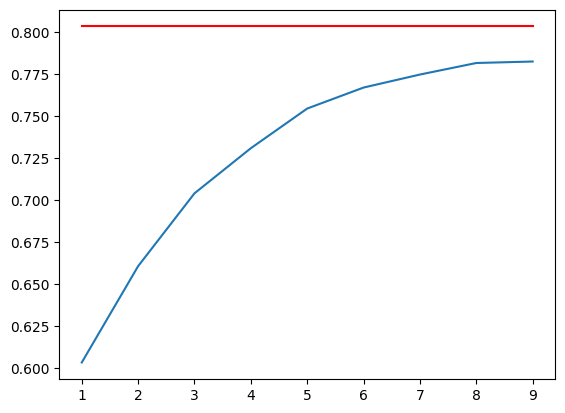

In [35]:
plt.plot([i for i in range(1,len(train_accuracy)+1)], train_accuracy)
plt.plot([i for i in range(1,len(test_accuracy)+1)], test_accuracy , c="red")

In [36]:
prd = ann.predict(x_test)
prd_data=[]

for i in prd:
    if i[0] >0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)
prd_data

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [37]:
prd1 = ann.predict(x_train)
prd1_data=[]

for i in prd1:
    if i[0] >0.5:
        prd1_data.append(1)
    else:
        prd1_data.append(0)
prd1_data

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test,prd_data)*100

80.35

In [40]:
accuracy_score(y_train,prd1_data)*100

79.45

In [67]:
#for new data prediction

In [68]:
import numpy as np

In [69]:
input_data=[[0.433879,-0.047942,-0.564197,0.306591,0.912419,-0.660018,-0.695982,0.324119,0.807737,-1.547768,-1.030670,-1.013811]]
input_data=np.array(input_data)
prd = ann.predict(input_data)
prd_data=[]

for i in prd:
    if i[0] >0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)
prd_data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


[0]

In [70]:
y_test  #check for same as predicted value

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64